In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('E-commerce.csv')

In [ ]:
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
df.shape

(2500, 7)

In [ ]:
df['profile_information'].value_counts()

0      64
184    16
174    16
214    15
185    15
       ..
42      1
301     1
398     1
64      1
454     1
Name: profile_information, Length: 429, dtype: int64

In [ ]:
df.drop('profile_information',axis=1,inplace=True)

In [ ]:
df.drop('ID',axis=1,inplace=True)

In [ ]:
df.describe()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000
mean,408.68000,94.475600,1445.090745,388.508637,200.973600
std,186.41409,38.866356,1167.663473,487.143968,99.136618
min,50.00000,10.000000,0.000000,0.000000,0.000000
25%,274.75000,67.000000,609.618538,56.298615,130.000000
50%,378.00000,92.000000,1036.189112,137.454623,200.000000
75%,522.00000,119.000000,1949.270949,679.540536,268.000000
max,1246.00000,259.000000,6567.402267,2428.406527,514.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n_clicks                 2500 non-null   int64  
 1   n_visits                 2500 non-null   int64  
 2   amount_spent             2500 non-null   float64
 3   amount_discount          2500 non-null   float64
 4   days_since_registration  2500 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 97.8 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [ ]:
df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration
0,-1.495250,-0.758535,-1.054611,-0.732800,0.323118
1,0.720691,-1.247488,-0.690292,-0.786002,0.272672
2,0.597285,0.193635,-0.246428,0.935872,0.464365
3,1.573801,-0.295317,-0.213449,0.947616,-0.534456
4,-1.006992,-0.269583,-1.083008,-0.665697,0.424009


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k=4
kmeans=KMeans(k)
y_pred=kmeans.fit_predict(df)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 1, ..., 0, 2, 1], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
clusters=df

In [ ]:
clusters['labels']=kmeans.labels_
clusters

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,labels
0,-1.495250,-0.758535,-1.054611,-0.732800,0.323118,3
1,0.720691,-1.247488,-0.690292,-0.786002,0.272672,3
2,0.597285,0.193635,-0.246428,0.935872,0.464365,1
3,1.573801,-0.295317,-0.213449,0.947616,-0.534456,1
4,-1.006992,-0.269583,-1.083008,-0.665697,0.424009,3
...,...,...,...,...,...,...
2495,2.121079,0.656854,-0.807284,-0.030993,1.634702,3
2496,0.393397,-0.887207,-0.783838,-0.545880,-0.897664,0
2497,-0.180709,0.425245,-1.237839,-0.797683,-1.180159,0
2498,-0.738719,-1.607768,1.495086,-0.637261,-0.907753,2


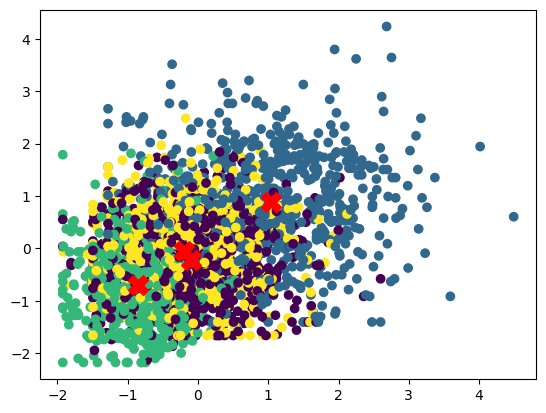

In [ ]:
 plt.scatter(clusters['n_clicks'], clusters['n_visits'], c=clusters['labels'])
 plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color='r',marker='X',s=200)

In [ ]:
kmeans.cluster_centers_[:,1]

array([-0.21928206,  0.88108055, -0.69436955, -0.0434251 ])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(2)
pca_df=pd.DataFrame(pca.fit_transform(df),columns=['f1','f2'])
pca_df.head()

,f1,f2
0,-1.974650,0.075960
1,-1.231926,0.510471
2,0.916939,0.658499
3,1.484444,0.206355
4,-1.563957,0.508232


<Axes: xlabel='f1', ylabel='f2'>

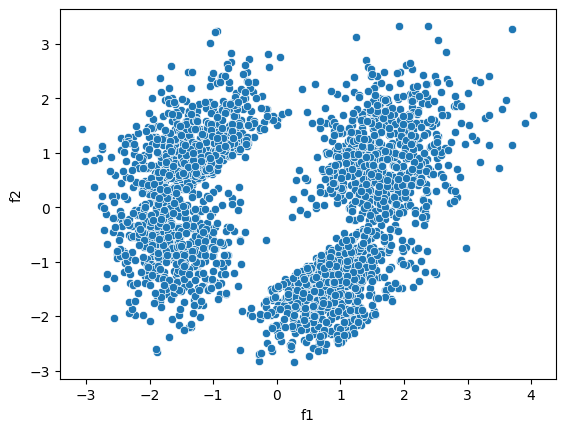

In [ ]:
pca_df['labels']=df['labels']
sns.scatterplot(x=pca_df['f1'],y=pca_df['f2'])

<Axes: xlabel='f1', ylabel='f2'>

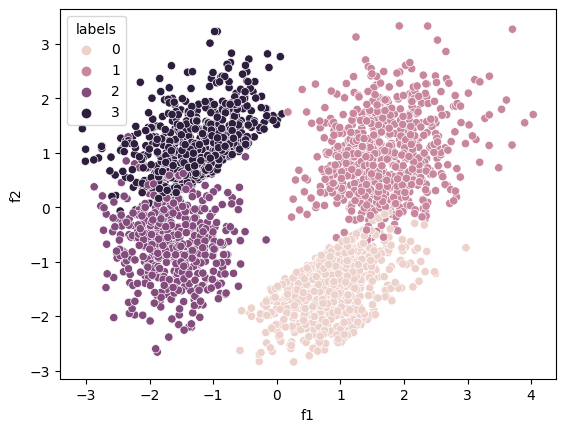

In [ ]:
sns.scatterplot(x=pca_df['f1'],y=pca_df['f2'],hue=pca_df['labels'])

In [ ]:
polar=clusters.groupby('labels').mean().reset_index()

In [ ]:
polar.head()

,labels,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration
0,0,-0.095548,-0.220161,-0.632729,-0.477835,-0.778630
1,1,1.035370,0.881081,-0.031678,1.515188,-0.014091
2,2,-0.851789,-0.694370,1.627023,-0.627321,-0.048653
3,3,-0.199392,-0.042736,-0.615065,-0.431149,0.906199


In [ ]:
polar=pd.melt(polar,id_vars='labels')
polar

,labels,variable,value
0,0,n_clicks,-0.095548
1,1,n_clicks,1.035370
2,2,n_clicks,-0.851789
3,3,n_clicks,-0.199392
4,0,n_visits,-0.220161
5,1,n_visits,0.881081
6,2,n_visits,-0.694370
7,3,n_visits,-0.042736
8,0,amount_spent,-0.632729
9,1,amount_spent,-0.031678


In [ ]:
import plotly.express as px

In [ ]:
fig=px.line_polar(polar,r='value',theta='variable',color='labels',line_close=True,height=700,width=800)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
#inertia means within cluster sum of squares
kmeans_per_k=[KMeans(k).fit(df) for k in range(1,11)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
wcss=[model.inertia_ for model in kmeans_per_k]

<Axes: >

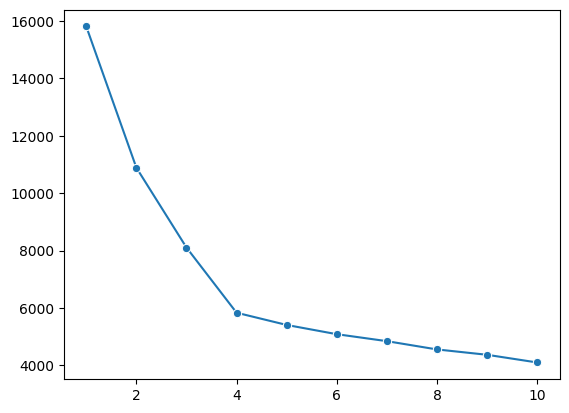

In [ ]:
sns.lineplot(x=np.arange(1,11),y=wcss,marker='o',)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score=[silhouette_score(df,model.labels_) for model in kmeans_per_k[1:]]

<Axes: >

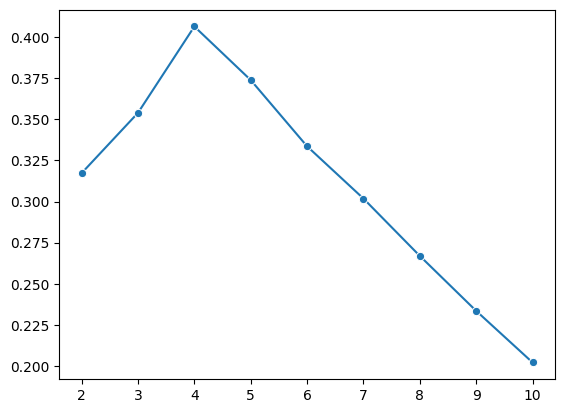

In [ ]:
sns.lineplot(x=np.arange(2,11),y=silhouette_score,marker='o')

In [ ]:
#so with help of wcss and silhoutee score we found that 4 clusters will be best for our case